In [1]:
import scipy.io
import pandas as pd
import mat4py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sympy import *
import math
import sympy as sy
from sympy import Sum
import random

# Loading in Data and Converting to Pandas DataFrame

In [2]:
mat_array = mat4py.loadmat('/Users/trebu/Downloads/vis_data.mat')

In [3]:
mat_array

{'W': [[0.063072899261157, 0.09561849433129076, 0.12641136468941216],
  [0.5418410089232286, -0.05661396345396874, 0.06715955918515822],
  [0.9577197116363646, 1.2987560774209057, 1.342079468027894],
  [-0.29945018584613553, 0.4505579792830716, 0.8089898285635103],
  [-0.046393278991246956, 0.019225775228446984, 0.8696773515279701],
  [0.6635842992435428, 0.9646456476573191, 0.6890610484146411],
  [-0.16394920174836483, 0.13074226901127756, 0.9646520462642842],
  [0.6627670105846682, 0.9303161860067731, 0.6773712686999946],
  [0.5214740115368801, 0.9994370150363807, 0.6297051511750228],
  [0.521999578551247, 0.038416602956727, 0.11213173537896633],
  [1.1355697784706444, 0.8617281521332256, 1.0766015004234493],
  [0.7943639441171512, 0.5335950544581949, 0.5909355348057175],
  [0.5104177193028845, -0.018680540675514112, 0.05577029444840058],
  [-0.11118797833905181, -0.3640282341742255, 0.12400570313249337],
  [0.7030732199846531, 0.23352151308218944, 0.22279516219893655],
  [-0.2645362

In [4]:
mat_dataframe = pd.DataFrame(mat_array)

In [5]:
mat_dataframe

,W
0,"[0.063072899261157, 0.09561849433129076, 0.126..."
1,"[0.5418410089232286, -0.05661396345396874, 0.0..."
2,"[0.9577197116363646, 1.2987560774209057, 1.342..."
3,"[-0.29945018584613553, 0.4505579792830716, 0.8..."
4,"[-0.046393278991246956, 0.019225775228446984, ..."
...,...
533,"[0.6657944213665705, 0.6711047226810104, 0.516..."
534,"[0.617734153974393, 0.4444045865757713, 0.4208..."
535,"[-0.2904368973431904, 0.5975676827371156, 0.97..."
536,"[-0.05203732989309018, 0.28845052434953444, 0...."


In [6]:
w1 = []
w2 = []
w3 = []
for i in range(0,len(mat_dataframe)):
    list_values = mat_dataframe["W"][i]
    w1.append(list_values[0])
    w2.append(list_values[1])
    w3.append(list_values[2])
new_mat_dataframe = pd.DataFrame()
new_mat_dataframe["w1"] = w1
new_mat_dataframe["w2"] = w2
new_mat_dataframe["w3"] = w3

In [7]:
new_mat_dataframe

,w1,w2,w3
0,0.063073,0.095618,0.126411
1,0.541841,-0.056614,0.067160
2,0.957720,1.298756,1.342079
3,-0.299450,0.450558,0.808990
4,-0.046393,0.019226,0.869677
...,...,...,...
533,0.665794,0.671105,0.516802
534,0.617734,0.444405,0.420828
535,-0.290437,0.597568,0.970739
536,-0.052037,0.288451,0.041013


# Problem 1: Develop a code to visualize all components of the provided dataset. Your end result should contain histograms and all pairwise scatter plots similar to the figure shown below.

QUESTION: Is the histogram plots just for the counts on the y-axis?

## Plot 1

(0.0, 60.0)

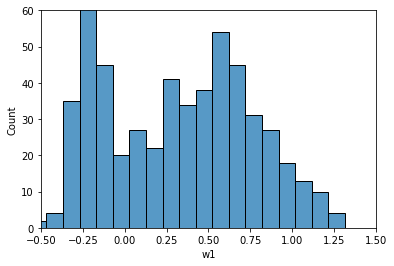

In [8]:
sns.histplot(data=new_mat_dataframe,x="w1",bins=19)
plt.xlim([-0.5, 1.5])
plt.ylim([0,60])

# Plot 2

(0.0, 60.0)

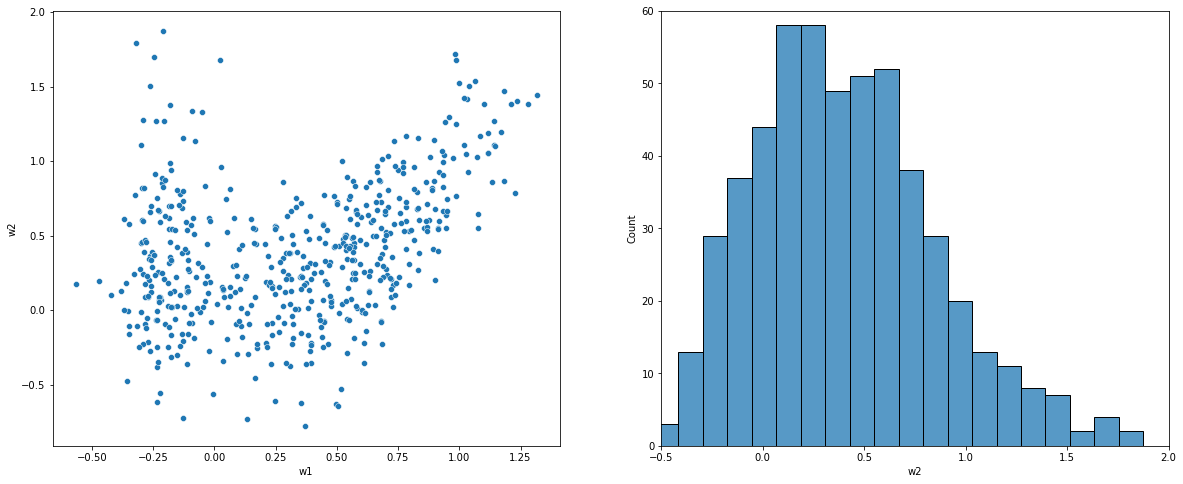

In [9]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(20,8))
sns.scatterplot(data=new_mat_dataframe, x='w1', y='w2', ax=ax1)
plt.xlim([-0.5, 1.5])
plt.ylim([-0.5,2])
sns.histplot(data=new_mat_dataframe,x="w2",bins=22)
plt.xlim([-0.5, 2])
plt.ylim([0, 60])

# Plot 3

<AxesSubplot:xlabel='w3', ylabel='Count'>

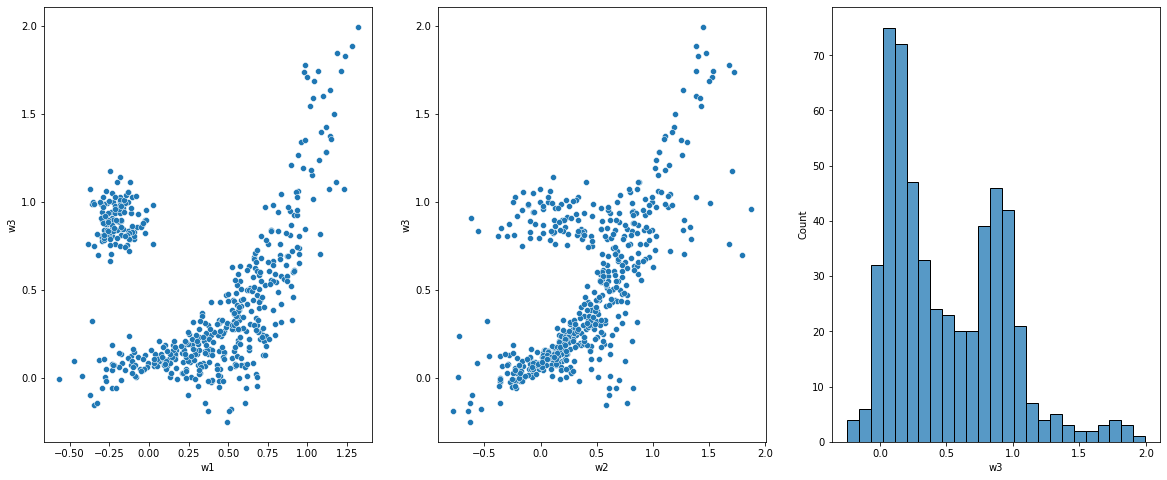

In [10]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,8))
sns.scatterplot(data=new_mat_dataframe, x='w1', y='w3', ax=ax1)
sns.scatterplot(data=new_mat_dataframe, x='w2', y='w3', ax=ax2)
sns.histplot(data=new_mat_dataframe, x='w3',bins = 25, ax=ax3)

# Question 2: With this problem, you will improve your simulation skills and test your understanding of random variables

Question: Do we pick the outcomes or Sigma m's?

## (i) Develop a function that applies the fundamental theorem of simulation and simulates draws Categorical 

In [11]:
def summation(values=None):
    ssum = 0
    summation = []
    for i in range(len(values)):
        ssum = ssum + values[i]
        summation.append(ssum)
    return summation

In [12]:
summation(values=[0,2,3,5,6])

[0, 2, 5, 10, 16]

In [13]:
def categorical(outcomes=[],probabilities=[]):
    
    C_sigmam = summation(probabilities) ##Starting by forming C_Sigma
    u=np.random.uniform(0,1,1)    ##Generating u
    print("U: ",u)
    print("C: ",C_sigmam)
    s = []
    for i in range(len(u)):
        for j in range(len(C_sigmam)):
            print(i,j)
            ##sort by lowest value? descending order
            if(u[i] < C_sigmam[j]): ##Finding lowest u such that u<C_m
                s.append(outcomes[j])## Appending result
                break
                
            else:
                continue
    
    
    return s

In [14]:
def categorical(outcomes=[],probabilities=[]):
    
    C_sigmam = summation(probabilities) ##Starting by forming C_Sigma
    u=np.random.uniform(0,1,1)    ##Generating u
    print("U: ",u)
    print("C: ",C_sigmam)

    for i in range(len(C_sigmam)):
        print(i)
        ##sort by lowest value? descending order
        if(u < C_sigmam[i]): ##Finding lowest u such that u<C_m
            s = outcomes[i]## Assigning outcome to s
            break ## Breaking out of the for loop and returning s
                
        else:
            continue
    
    
    return s

In [15]:
out = random.sample(range(1, 7), 6)
out

[2, 6, 1, 3, 5, 4]

In [16]:
prob = []
for i in range(len(out)):
    prob.append(1/6)
prob

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [17]:
s_outcome = []

In [18]:
s = categorical(out,prob)

U:  [0.2312068]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1


In [19]:
for i in range(20000):
    s_outcome.append(categorical(out,prob))

U:  [0.03077703]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.51780192]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.3027632]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.47069295]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.74891322]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.15573736]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.91552554]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.74861918]
C:  [0.16666666666666666, 0.3333333333333333

1
2
U:  [0.70869738]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.16217565]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.19961849]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.65633382]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.38168688]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.44310505]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.15447087]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.57721858]
C:  [0.16666666666666666, 0.3333333333333333,

U:  [0.30861311]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.897936]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.99300755]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.46932658]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.91539043]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.42440091]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.09876417]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.32334134]
C:  [0.16666666666666666, 0.3333333

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.11724465]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.42502236]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.29169152]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.97431775]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.64412067]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.46609242]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.99644008]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6

U:  [0.50486079]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.17794107]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.07399117]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.06139871]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.22034776]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.47878645]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.41917678]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.55806836]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.66

U:  [0.33712487]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.55121868]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.72166336]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.98340387]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.58664771]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.9612786]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.1319116]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.14449415]
C:  [0.16666666666666666, 0.333

4
U:  [0.58123284]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.56168239]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.45659462]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.05637058]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.81615405]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.90937918]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.20401604]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.10711133]
C:  [0.16666666666666666, 0.3333333

1
2
3
4
U:  [0.40803612]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.2554418]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.06102992]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.96829375]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.99902832]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.56082964]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.37631463]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.17208831]
C:  [0.16666666666666666, 0.33

1
2
U:  [0.28840175]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.28406219]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.73049903]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.26861523]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.54683204]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.57329088]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.90196474]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.193348]
C:  [0.16666666666666666, 0.3333333

1
2
U:  [0.96087263]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.31574685]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.01552184]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.77494004]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.90904526]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.46537541]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.34188589]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.6253304]
C:  [0.16666666666666666, 0.3333

U:  [0.19747052]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.24631077]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.16015685]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.47127251]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.55428371]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.2583691]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.15747458]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.85480726]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.66666

2
U:  [0.54369952]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.06756595]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.06558938]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.56026659]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.39108492]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.11305589]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.041911]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.18307652]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.47300938]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.27939568]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.17967092]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.98978287]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.78787664]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.7087464]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.88654156]
C:  [0.16666666666666666, 0.3333333333333333, 0.5

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.95643047]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.54821698]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.40891318]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.6502566]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.40137321]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.78060708]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.0376748]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6

2
U:  [0.12432972]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.71639741]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.99969162]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.52593732]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.28153943]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.88159681]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.75070657]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.24247154]
C:  [0.16666666666666666, 0

1
U:  [0.73418237]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.3155201]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.68985685]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.87201492]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.4755296]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.2430531]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.9454159]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.08524236]
C:  [0.16666666666666666, 0.333

U:  [0.15900067]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.24990242]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.00114282]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.74628695]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.40379009]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.24624851]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.37532664]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.40609059]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.

1
2
3
4
U:  [0.53440474]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.17348846]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.1343009]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.93007347]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.32111954]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.7701801]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.94270262]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.05378102]
C:  [0.16666666666666666, 0.3

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.90355032]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.44655379]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.92048398]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.91877041]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.65894266]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.8022072]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.97943137]
C:  [0.16666666666666666, 0.33333

0
1
2
3
4
5
U:  [0.60782811]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.31800749]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.34978506]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.06666584]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.84488696]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.63025732]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.31459466]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.49801511]
C:  [0.16666666666666666, 0.333

0
1
2
3
4
5
U:  [0.99721046]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.91822514]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.96770329]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.62940238]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.83912623]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.83704051]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.46358213]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.7368821]
C:

0
1
2
U:  [0.15033277]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.71014246]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.72338826]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.11305663]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.81029836]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.10357042]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.55112991]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.71374413]
C:  [0.16666666666666666, 0.333333333

U:  [0.10146891]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.93783602]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.6080112]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.77106877]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.08505426]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.70808639]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.44022232]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.42655231]
C:  [0.16666666666666666, 0.3333333333

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.67398633]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.9301965]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.34298041]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.28273663]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.47718722]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.14125888]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.35474164]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666

U:  [0.53276356]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.25995674]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.20862448]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.2205702]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.47130932]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.4915058]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.60608757]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.43997736]
C:  [0.16666666666666666, 0.3333333333333333, 0.5

0
1
2
3
U:  [0.85156969]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.70615509]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.09365855]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.79857935]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.78624405]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.18091978]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.48236523]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.02901446]
C:  [0.16666666666666666,

2
3
U:  [0.54557756]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.35612584]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.5947543]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.27269437]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.99417666]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.13842373]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.94867913]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.43177449]
C:  [0.16666666666666666, 0.3333

U:  [0.29104741]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.59918213]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.75472097]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.2888576]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.35070618]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.1082677]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.89490522]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.04111064]
C:  [0.16666666666666666, 0.333333333333333

U:  [0.60627333]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.96543132]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.97752801]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.89241907]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.44241061]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.83855111]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.86081763]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.91575249]
C:  [0.166666

2
3
4
U:  [0.39827395]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.33788419]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.65565654]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.73792087]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.2298353]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.09268693]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.71673226]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.60390342]
C:  [0.16666666666666666, 0.33333333

1
2
U:  [0.94541798]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.46017087]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.86863863]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.36777828]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.31188041]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.25330723]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.41793599]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.20521002]
C:  [0.16666666666666666, 0.33333

0
1
2
3
U:  [0.66079871]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.28120085]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.66279825]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.32536267]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.35434861]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.13800531]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.71659634]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.98909069]
C:  [0.16666666666666666, 0.333333333

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.04358659]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.79792647]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.60204545]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.352952]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.25947718]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.02904325]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.14562913]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.666666666

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.82919501]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.85812775]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.13444108]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.04183311]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.49911802]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.82258979]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.57729472]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666

1
2
3
4
U:  [0.88320349]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.32212444]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.26912923]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.88851261]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.03857833]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.17627177]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.44043438]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.71250221]
C:  [0.16666666666666666, 0.3333333

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.91627939]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.15419391]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.57672192]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.52410919]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.79718382]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.13027716]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.64675036]
C:  [0.16666666666666666, 0.3333333333333333, 0.5,

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.87253942]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.68244566]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.44817812]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.30819444]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.14728727]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.74975749]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.39855912]
C:  [0.16666666666666666, 0.3333333333333333, 0.

3
4
5
U:  [0.97187646]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.16022679]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.61183596]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.77175183]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.76028046]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.32424129]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.89483967]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.00607516]
C:  [0.1666666666666666

0
1
2
3
4
5
U:  [0.7715904]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.6493331]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.22493007]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.78933343]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.75239814]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.46242468]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.93088021]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.80148911]
C:  [0.1666666666

U:  [0.86013478]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.08519488]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.11271435]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.96191816]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.99912858]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.2970376]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.72712155]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.92456953]
C:  [0.16666666666666666, 0.333333

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.76657736]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.24714586]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.20867561]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.75396416]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.76265279]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.42693615]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.36404216]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.666

U:  [0.94261328]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.39851376]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.06051648]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.2551341]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.79042619]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.58841942]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.7595662]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.72340848]
C:  [0.16666666666666666, 0.333333333

U:  [0.60877363]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.67764266]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.70091599]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.16696549]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.15074795]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.95772774]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.29284411]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.8614088]
C:  [0.16666666666666666, 0.3333333333

0
1
2
3
U:  [0.03408899]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.22093542]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.770069]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.1301652]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.69710369]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.08076439]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.03970203]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.98221505]
C:  [0.16666666666666666, 0.3333333333333333, 0.5,

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.05593924]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.79484555]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.18529955]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.14257848]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.94972568]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.85122993]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.4528806]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.66666666

U:  [0.11690183]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.36870383]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.30469636]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.97079562]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.76774538]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.25251801]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.8402437]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.42965491]
C:  [0.16666666666666666, 0.3333333333

0
U:  [0.34827468]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.23014574]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.69104139]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.27654613]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.55834178]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.3748754]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.47709148]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.87539865]
C:  [0.16666666666666666, 0.33333333333333

0
1
U:  [0.34942092]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.55652599]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.89354264]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.91896531]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.24557961]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.31024676]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.57145731]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.69340844]
C:  [0.16666666666666666, 0.3

U:  [0.86891698]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.02265062]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.02752415]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.74536653]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.38511326]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.29720088]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.53698281]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.47148066]
C:  [0.16666666666666666, 0.333333333333333

1
2
3
U:  [0.41565679]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.03571302]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.83390873]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.4892944]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.09546237]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.95469257]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.5578143]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.39883475]
C:  [0.16666666666666666, 0.3333333

U:  [0.84629573]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.52056683]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.78810021]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.39261982]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.49875922]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.40116465]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.18286008]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.13995122]
C:  [0.16666666666666666, 0.3333333

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.25032479]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.09631194]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.89903932]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.58322371]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.35620338]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.30119114]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.91802696]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.666666666

4
5
U:  [0.00476024]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.84689002]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.23579467]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.12260181]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.23189326]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.52503202]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.80238164]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.96065341]
C:  [0.16666666666666666, 0.3333333333333

U:  [0.88043785]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.5737921]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.6038765]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.80056286]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.8413386]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.82834405]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.15206553]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.05175793]
C:  [0.16666666666666666, 0.

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.41684939]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.81098495]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.09919069]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.80143216]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.449062]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.74569284]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.21175089]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.666

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.11489593]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.67969742]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.39405172]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.64390861]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.38229441]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.27017526]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.27363421]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666

U:  [0.45051248]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.5508884]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.22743796]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.29822721]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.49855779]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.26430418]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.83000256]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.7074916]
C:  [0.16666666666666666, 0.3333333333333333, 0

U:  [0.70574845]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.71100804]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.75127007]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.27508432]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.48656023]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.55546493]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.58951529]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.48593022]
C:  [0.16666666666666666, 0.333

U:  [0.32581013]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.57962076]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.13978401]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.51945575]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.42286698]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.52393528]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.62467839]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.47980385]
C:  [0.16666666666666666, 0.333333333333333

U:  [0.01516281]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.85137425]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.16245746]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.83846385]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.23919435]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.76391266]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.19948724]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.72671791]
C:  [0.16666666666666666, 0.3333333333333

U:  [0.33749009]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.07196733]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.4817548]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.15240143]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.04755045]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.61866293]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.75421831]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.37075859]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0

U:  [0.46347604]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.52406936]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.54747979]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.33893738]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.70716346]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.41463938]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.17204684]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.29746213]
C:  [0.16666666666666666, 0.33333333333

0
1
2
U:  [0.25027676]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.91613041]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.32905672]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.4079041]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.06543252]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.08396588]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.68440139]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.46062683]
C:  [0.16666666666666666, 0.33333333333333

U:  [0.19500968]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.32452458]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.9989295]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.73099527]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.3924308]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.53839642]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.93397787]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.55771256]
C:  [0.16666666666666666, 0.33333

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.82641701]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.04487102]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.47016517]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.73695154]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.73577387]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.57794491]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.5837929]
C:  [0.16666666666666666, 0.3333333333333333, 0.5

U:  [0.26775855]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.37612712]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.6396249]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.56790489]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.8961709]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.34235232]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.51242816]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.18312007]
C:  [0.16666666666666666, 0.333333333

0
1
U:  [0.23518224]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.02133385]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.28075353]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.35590226]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.46318087]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.81834558]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.74141376]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.47482505]
C:  [0.16666666666666666, 0.3333333333333

U:  [0.34221642]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.86329147]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.93382892]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.91825312]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.25774388]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.1060025]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.37144587]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.1603741]
C:  [0.16666666666666666, 0.3333333

2
3
U:  [0.59862962]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.14718808]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
U:  [0.34159554]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.73951015]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.70223111]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.79408697]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.66201349]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.88654063]
C:  [0.16666666666666666, 0.3

C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
U:  [0.5486064]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
U:  [0.37764049]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
U:  [0.94285655]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.17950449]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
U:  [0.83350886]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.91162846]
C:  [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 0.9999999999999999]
0
1
2
3
4
5
U:  [0.5372123]
C:  [0.16666666666666666, 0.33333333333333

In [20]:
s = pd.DataFrame(s_outcome)
s

,0
0,2
1,3
2,6
3,1
4,5
...,...
19995,5
19996,2
19997,1
19998,5


## (ii)  Use simulations to verify that the function you developed in (i) simulates variables with the correct statistics.

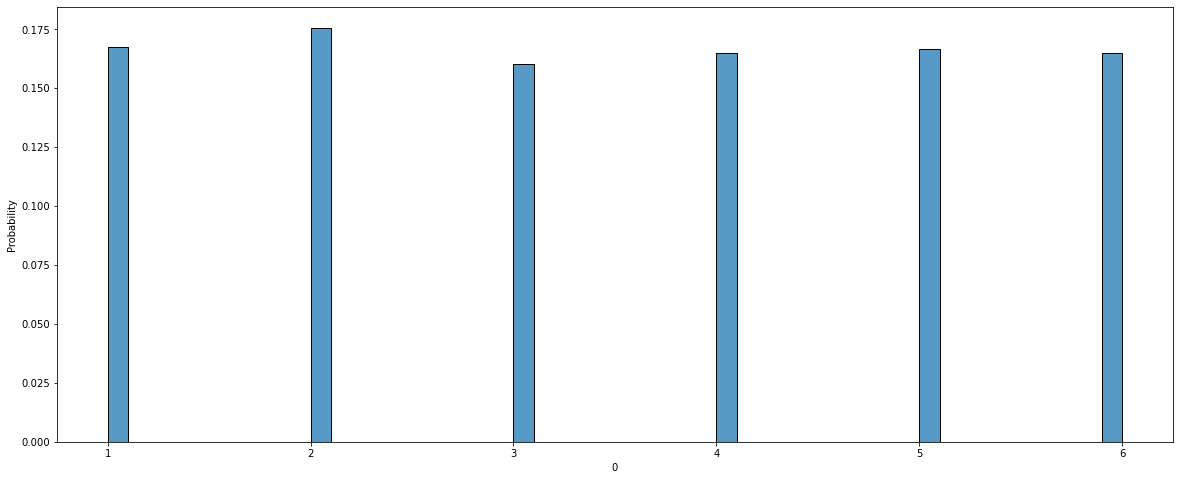

In [21]:
fig, ax1 = plt.subplots(1,1,figsize=(20,8))
ax1 = sns.histplot(data=s, x=0,ax=ax1,stat="probability",bins=50)
#ax1.bar_label(ax1.containers[0])

In [22]:
def summation(values=[]):
    summation = []
    ssum = 0
    for i in range(len(values)):
        ssum = ssum+values[i]
        summation.append(ssum)
    return summation

In [23]:
check = summation(values=[0,1,2])

In [24]:
check

[0, 1, 3]

In [25]:
summation = []
for i in range(0,len(probabilities)):
    summation.append()

NameError: name 'probabilities' is not defined

# Question 3: In this problem, you will investigate the Box-Muller algorithm.

## (i) Show mathematically that the Box-Muller algorithm indeed produces values with the correct statistics.

QUESTION: What do we mean mathematically? Does this mean proof or does this mean by hand perform the algorithm?

QUESTION: What does correct statistics mean?

In [ ]:
#This part of the problem will be some sort of proof that we will see next week

## (ii) Develop a function that takes as input μ,σ and implements the Box-Muller algorithm
`x = μ + σ√−2 log u cos(2πv)`

In [ ]:
def box_muller(mu = None, sigma = None):
    u,v = (np.random.uniform(0,1,1000), np.random.uniform(0,1,1000))
    
    x_append = []
    y_append = []
    for i in range(0,len(u)):
        x = mu + sigma * math.sqrt(-2*math.log(u[i]))*(math.cos(2*math.pi*v[i]))
        y = mu + sigma * math.sqrt(-2*math.log(u[i]))*(math.sin(2*math.pi*v[i]))
       
        y_append.append(y)
        x_append.append(x)
    return x_append,y_append

In [ ]:
x_mueller,y_mueller = box_muller(mu=20,sigma=40)

In [ ]:
random_normal = np.random.normal(0,1,1000)

In [ ]:
box_dataframe = pd.DataFrame()
pd.concat([pd.Series(x_mueller),pd.Series(random_normal)],ignore_index=True)
box_dataframe["Box_Mueller_X"] = x_mueller
box_dataframe["Box_Mueller_Y"] = y_mueller
box_dataframe["Random_Normal"] = random_normal
#box_dataframe["Values"] = pd.concat([pd.Series(x_mueller),pd.Series(random_normal)])

In [ ]:
box_dataframe

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(20,8))
ax1 = sns.histplot(data=box_dataframe, x='Box_Mueller_X',ax=ax1,stat="density",kde=True)
ax1.set_xlabel("Values of X-Random Variable for Box Mueller Algorithm")
ax1.set_title('Probability Density Plot of Box Mueller Algorithm')
#sns.histplot(data=box_dataframe,x="Random_Normal",ax=ax2,stat="density")

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(20,8))
ax1 = sns.histplot(data=box_dataframe, x='Box_Mueller_Y',ax=ax1,stat="density",kde=True,bins=50)
ax1.set_xlabel("Values of Y-Random Variable for Box Mueller Algorithm")
ax1.set_title('Probability Density Plot of Box Mueller Algorithm')